# Utilisation de la librairie caret

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import random 
random.seed(42)

In [3]:
df = pd.read_csv('../data/Fraud.csv')
df = df.sample(n=200_000, random_state=42)

## Mise en place de l'environnement

In [4]:
from sklearn.model_selection import train_test_split
df = df.drop(['isFlaggedFraud','step', 'nameOrig', 'nameDest'], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

In [5]:
try : 
    from pycaret.classification import *
except : 
    from pycaret.classification import setup, compare_models, evaluate_model, plot_model

import sklearn
sklearn.__version__

'0.23.2'

In [6]:
df_s = setup(
    data=df_train, 
    target='isFraud', 
    session_id=42, 
    data_split_stratify=True, 
    remove_outliers=True
) 
# On crée un setup pour pycaret avec les données d'entrainement, la variable cible, un id de session et différents paramètres (ici on supprime les outliers, on split les données en gardant la proportion de la variable cible)

,Description,Value
0,session_id,42
1,Target,isFraud
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(140000, 7)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
models = compare_models() # On compare les différents modèles de classification disponibles dans pycaret

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9994,0.8346,0.5856,0.8475,0.6796,0.6793,0.6971,2.3970
et,Extra Trees Classifier,0.9993,0.8260,0.5773,0.7486,0.6352,0.6349,0.6484,1.1720
dt,Decision Tree Classifier,0.9990,0.8016,0.6038,0.5609,0.5763,0.5758,0.5788,0.1600
knn,K Neighbors Classifier,0.9989,0.6986,0.2742,0.6971,0.3670,0.3665,0.4168,1.2750
gbc,Gradient Boosting Classifier,0.9989,0.6381,0.3212,0.5552,0.3705,0.3702,0.4007,4.9990
lr,Logistic Regression,0.9988,0.6597,0.0273,0.0750,0.0400,0.0399,0.0451,1.8710
ridge,Ridge Classifier,0.9988,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0430
dummy,Dummy Classifier,0.9988,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0450
ada,Ada Boost Classifier,0.9987,0.9331,0.1152,0.3486,0.1702,0.1698,0.1978,1.3990
svm,SVM - Linear Kernel,0.9986,0.0000,0.0000,0.0000,0.0000,-0.0002,-0.0002,0.1900


In [8]:
evaluate_model(models) 
# On évalue le modèle ayant la meilleur métrique (ici accuracy). Cette fonction permet de voir une multitudes d'informations sur le modèle (matrice de confusion, courbe ROC, etc.)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [9]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9987,0.7270,0.4545,0.4545,0.4545,0.4539,0.4539
1,0.9991,0.8634,0.7273,0.6154,0.6667,0.6662,0.6686
2,0.9990,0.7725,0.5455,0.6000,0.5714,0.5709,0.5716
3,0.9991,0.8634,0.7273,0.6154,0.6667,0.6662,0.6686
4,0.9988,0.7270,0.4545,0.5000,0.4762,0.4756,0.4761
5,0.9990,0.8179,0.6364,0.5833,0.6087,0.6082,0.6088
6,0.9987,0.6665,0.3333,0.5000,0.4000,0.3994,0.4076
7,0.9987,0.7913,0.5833,0.5000,0.5385,0.5378,0.5394
8,0.9990,0.8331,0.6667,0.6154,0.6400,0.6395,0.6400


In [10]:
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

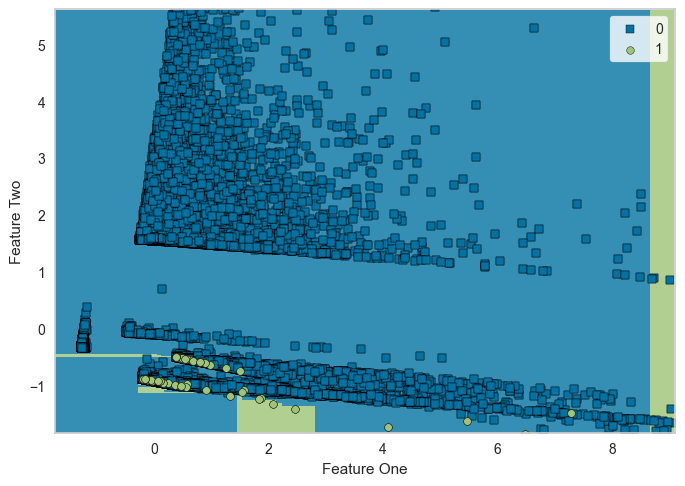

In [11]:
plot_model(dt, plot='boundary')
plt.show()